In [1]:
# Assignment 3 - Nashville
# Sayali Shende

In [2]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV




import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Data Prep:

# Load the dataset

Df = pd.read_csv('Nashville_housing_data.csv')

In [4]:
# First top 5 data rows

Df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [5]:
# Data information

Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [6]:
# Checking for nulls

Df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [7]:
# Checking for '?' in each variable

for column in Df.columns:
    if Df[column].dtype in [int, float, object]:
        # Check for '?' only in columns with 'object' dtype (strings)
        question_mark_count = (Df[column] == '?').sum()
        
        if question_mark_count > 0:
            print(f"Column '{column}' has {question_mark_count} '?' values.")
            
# Flag to check if any columns have missing data
missing_data_found = False

# Print a message if no columns have missing data
if not missing_data_found:
    print("No columns have missing data with question marks.")


No columns have missing data with question marks.


In [8]:
# Calculate the percentage of NaN values in the 'Sales Price compared to value' column
Missing_percent_half_bath    = (Df['Half Bath'].isna().sum() / len(Df)) * 100
Missing_percent_prop_address = (Df['Property Address'].isna().sum() / len(Df)) * 100
Missing_percent_prop_city    = (Df['Property City'].isna().sum() / len(Df)) * 100
Missing_percent_fin_area     = (Df['Finished Area'].isna().sum() / len(Df)) * 100
Missing_percent_found_typ    = (Df['Foundation Type'].isna().sum() / len(Df)) * 100
Missing_percent_bedroom      = (Df['Bedrooms'].isna().sum() / len(Df)) * 100

print(f"Percentage of NaN values in the 'Half Bath' column: {Missing_percent_half_bath:.2f}%")
print(f"Percentage of NaN values in the 'Property Address' column: {Missing_percent_prop_address:.2f}%")
print(f"Percentage of NaN values in the 'Property City' column: {Missing_percent_prop_city:.2f}%")
print(f"Percentage of NaN values in the 'Finished Area' column: {Missing_percent_fin_area:.2f}%")
print(f"Percentage of NaN values in the 'Foundation Type' column: {Missing_percent_found_typ:.2f}%")
print(f"Percentage of NaN values in the 'Bedrooms' column: {Missing_percent_bedroom:.2f}%")

Percentage of NaN values in the 'Half Bath' column: 0.48%
Percentage of NaN values in the 'Property Address' column: 0.01%
Percentage of NaN values in the 'Property City' column: 0.01%
Percentage of NaN values in the 'Finished Area' column: 0.00%
Percentage of NaN values in the 'Foundation Type' column: 0.00%
Percentage of NaN values in the 'Bedrooms' column: 0.01%


In [9]:
# Drop rows with NaN values in the 'Half Bath' column
Df_new = Df.dropna(subset=['Half Bath','Property Address','Property City','Finished Area','Foundation Type','Bedrooms'])


In [10]:
# New DF
Df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22536 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22536 non-null  int64  
 1   Parcel ID                          22536 non-null  object 
 2   Land Use                           22536 non-null  object 
 3   Property Address                   22536 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22536 non-null  object 
 6   Sale Date                          22536 non-null  object 
 7   Legal Reference                    22536 non-null  object 
 8   Sold As Vacant                     22536 non-null  object 
 9   Multiple Parcels Involved in Sale  22536 non-null  object 
 10  City                               22536 non-null  object 
 11  State                              22536 non-null  object 


In [11]:
# Drop columns with null and unnammed column

Df_new.drop(columns=['Suite/ Condo   #', 'Unnamed: 0', 'City'], inplace=True)

Df_new.head()
Df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22536 entries, 0 to 22650
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Parcel ID                          22536 non-null  object 
 1   Land Use                           22536 non-null  object 
 2   Property Address                   22536 non-null  object 
 3   Property City                      22536 non-null  object 
 4   Sale Date                          22536 non-null  object 
 5   Legal Reference                    22536 non-null  object 
 6   Sold As Vacant                     22536 non-null  object 
 7   Multiple Parcels Involved in Sale  22536 non-null  object 
 8   State                              22536 non-null  object 
 9   Acreage                            22536 non-null  float64
 10  Tax District                       22536 non-null  object 
 11  Neighborhood                       22536 non-null  int64  


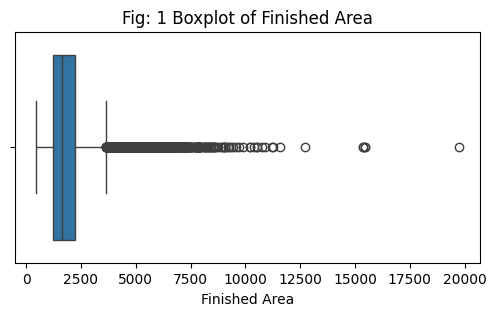

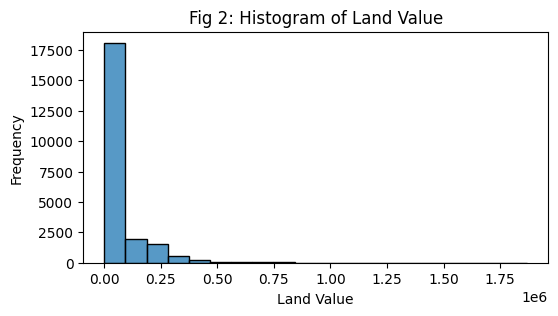

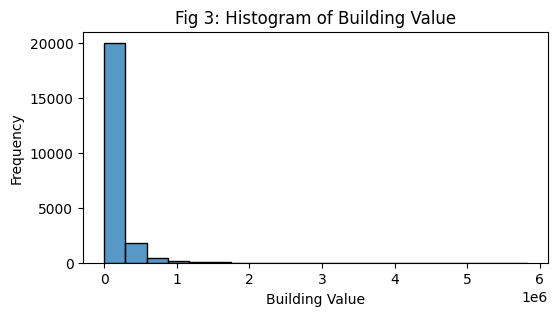

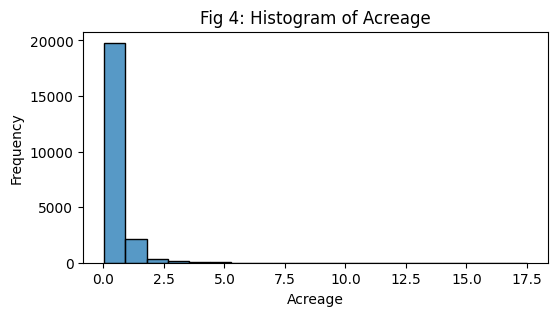

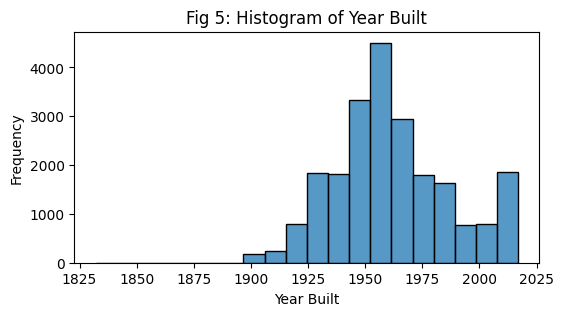

In [12]:
# Data Visualization

plt.figure(figsize=(6, 3))
sns.boxplot(x=Df_new['Finished Area'])
plt.title('Fig: 1 Boxplot of Finished Area')
plt.xlabel('Finished Area')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(x=Df_new['Land Value'], bins = 20)
plt.xscale('linear')  # Explicitly set x-axis to linear scale
plt.title('Fig 2: Histogram of Land Value')
plt.xlabel('Land Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(x=Df_new['Building Value'], bins = 20)
plt.xscale('linear')  # Explicitly set x-axis to linear scale
plt.title('Fig 3: Histogram of Building Value')
plt.xlabel('Building Value')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(6, 3))
sns.histplot(x=Df_new['Acreage'], bins = 20)
plt.xscale('linear')  # Explicitly set x-axis to linear scale
plt.title('Fig 4: Histogram of Acreage')
plt.xlabel('Acreage')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(6, 3))
sns.histplot(x=Df_new['Year Built'], bins = 20)
plt.xscale('linear')  # Explicitly set x-axis to linear scale
plt.title('Fig 5: Histogram of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()


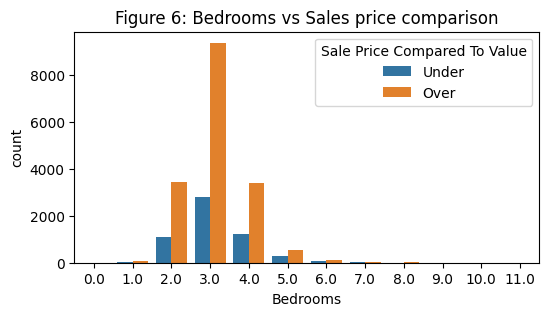

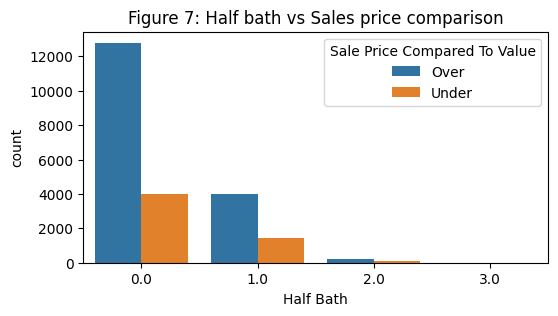

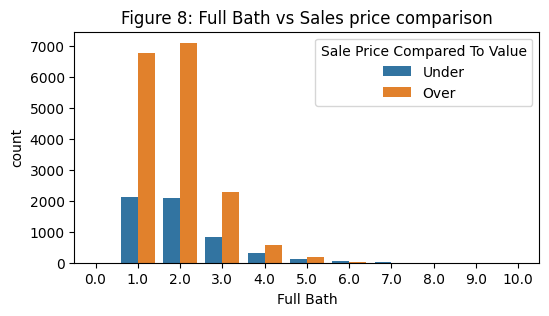

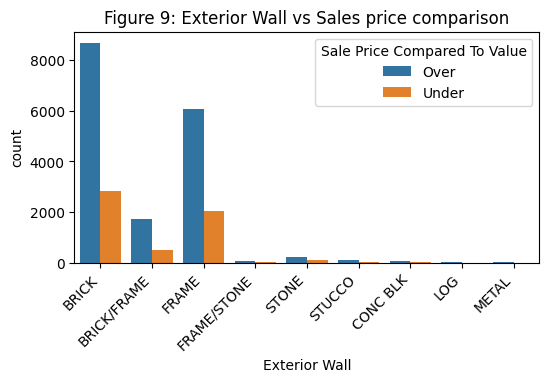

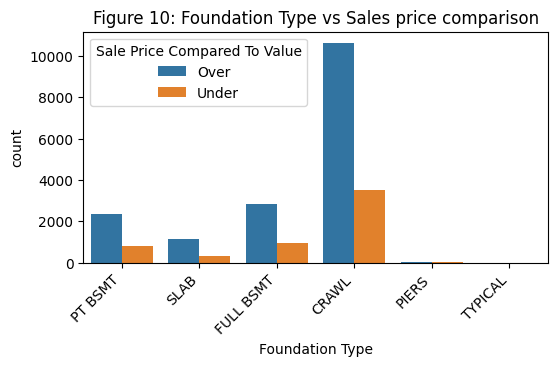

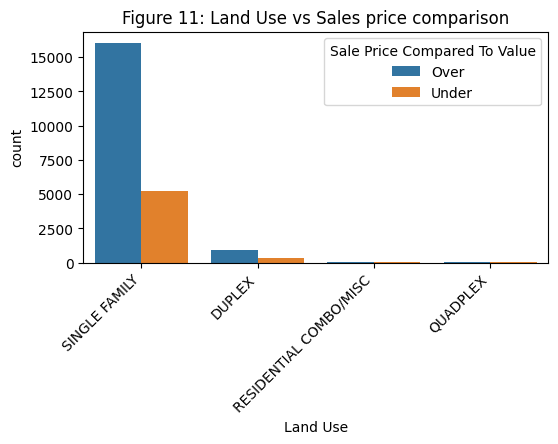

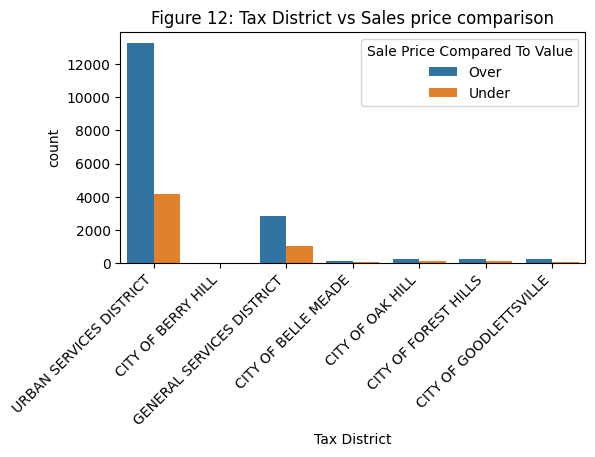

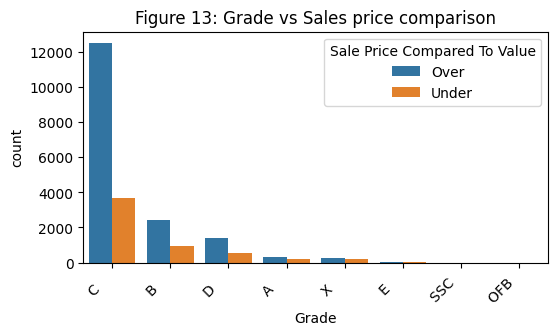

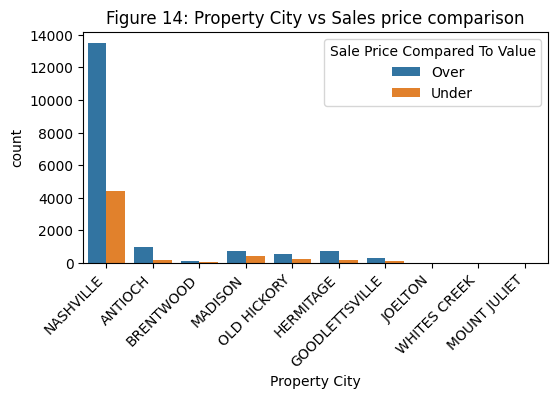

In [13]:
# Bar plots 

plt.figure(figsize=(6, 3))
sns.countplot(x='Bedrooms', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 6: Bedrooms vs Sales price comparison')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Half Bath', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 7: Half bath vs Sales price comparison')
plt.show()


plt.figure(figsize=(6, 3))
sns.countplot(x='Full Bath', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 8: Full Bath vs Sales price comparison')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Exterior Wall', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 9: Exterior Wall vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Foundation Type', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 10: Foundation Type vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Land Use', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 11: Land Use vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Tax District', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 12: Tax District vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Grade', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 13: Grade vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='Property City', hue='Sale Price Compared To Value', data=Df_new)
plt.title('Figure 14: Property City vs Sales price comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Linear Regression

# Removing Unwanted columns
Df_reg = Df_new
Df_reg.drop(columns=['Parcel ID', 'Property Address', 'Property City', 'Sale Date', 'Legal Reference', 
                                  'State', 'Neighborhood'], inplace=True)


In [15]:
Df_reg.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,No,No,0.11,CITY OF BERRY HILL,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,No,No,0.34,URBAN SERVICES DISTRICT,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [16]:
# 1. Converting the target variable to 0 and 1.
target_variable = 'Sale Price Compared To Value'

# Map 'over' to 1 and 'under' to 0
Df_reg[target_variable] = Df_reg['Sale Price Compared To Value'].map({'Over': 1, 'Under': 0})
Df_reg.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,1
1,SINGLE FAMILY,No,No,0.11,CITY OF BERRY HILL,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,1
2,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,0
3,SINGLE FAMILY,No,No,0.34,URBAN SERVICES DISTRICT,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,0
4,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,0


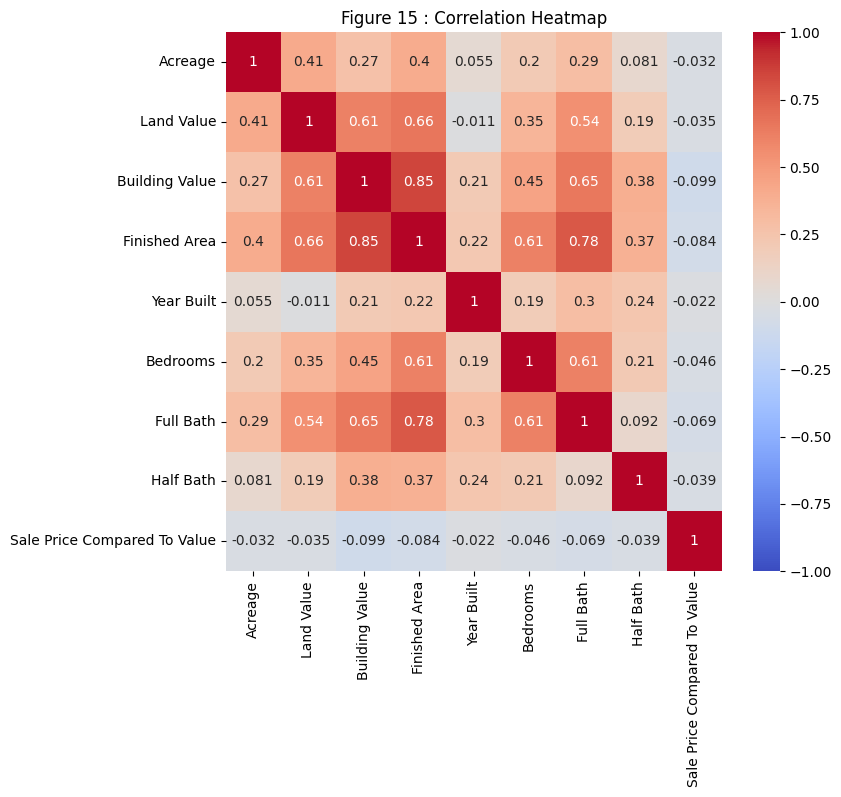

In [17]:
# Multicolinearity mapping
Num_col = Df_reg.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = Num_col.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Figure 15 : Correlation Heatmap")
plt.show()

In [18]:
# One hot encoding and normalizing

# Separate features (X) and target variable (y)
X = Df_reg.drop(target_variable, axis=1)
y = Df_reg[target_variable]

# Apply one-hot encoding to features
X_encoded_lin = pd.get_dummies(X)

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded_lin)

# Converting the normalized array back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X_encoded_lin.columns)
X_normalized_df.head()

,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Land Use_DUPLEX,Land Use_QUADPLEX,...,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,-0.465835,-0.370834,-0.198406,-0.709974,-0.811308,-1.329853,-0.929797,-0.562705,-0.235481,-0.038871,...,-0.12153,-0.08349,-0.157722,-0.419689,0.627998,-0.304392,-0.050356,-0.006661,-0.006661,-0.147836
1,-0.563707,-0.351424,-0.075125,0.163821,1.478202,-0.125772,0.121367,1.519923,-0.235481,-0.038871,...,-0.12153,-0.08349,-0.157722,-0.419689,0.627998,-0.304392,-0.050356,-0.006661,-0.006661,-0.147836
2,-0.465835,-0.438770,0.377433,0.214639,-0.539671,1.078308,0.121367,-0.562705,-0.235481,-0.038871,...,-0.12153,-0.08349,-0.157722,2.382716,-1.592361,-0.304392,-0.050356,-0.006661,-0.006661,-0.147836
3,-0.188533,-0.438770,-0.178913,0.050796,-2.014271,-1.329853,-0.929797,-0.562705,-0.235481,-0.038871,...,-0.12153,-0.08349,-0.157722,-0.419689,0.627998,-0.304392,-0.050356,-0.006661,-0.006661,-0.147836
4,-0.465835,-0.438770,-0.452871,-0.813884,-0.656087,-1.329853,-0.929797,-0.562705,-0.235481,-0.038871,...,-0.12153,-0.08349,-0.157722,-0.419689,0.627998,-0.304392,-0.050356,-0.006661,-0.006661,-0.147836


In [19]:
# DATA SPLIT
# Assuming 'y' is your target variable and 'X_normalized_df' is your normalized feature DataFrame
X_with_constant = sm.add_constant(X_normalized_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.2, random_state=42)

# Reset indices to ensure proper alignment
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)




Accuracy Logistic Regression: 0.7595385980479148
Confusion Matrix:
 [[  39 1070]
 [  14 3385]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.04      0.07      1109
           1       0.76      1.00      0.86      3399

    accuracy                           0.76      4508
   macro avg       0.75      0.52      0.46      4508
weighted avg       0.75      0.76      0.67      4508

Precision Logistic Regression: 0.76
Recall Logistic Regression: 1.00
Specificity Logistic Regression: 0.0351668169522092


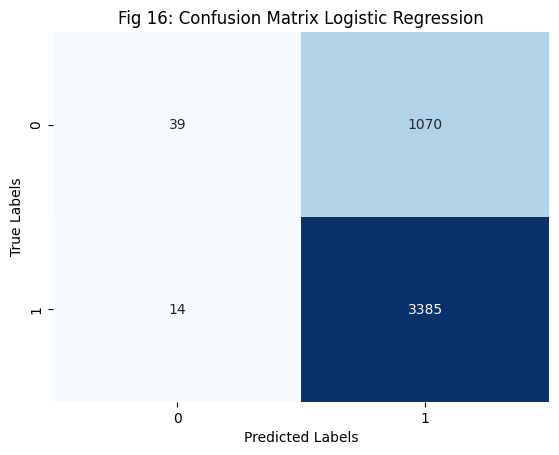

In [20]:
# PART 2 : Logistic Regression

model_log_reg = LogisticRegression()

# Fit the model on the training data
model_log_reg.fit(X_train, y_train)


# Make predictions on the test set
y_pred_logreg = model_log_reg.predict(X_test)

# Evaluating the LOGISTIC REGRESSION model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
precision_logreg = classification_rep_logreg.split('\n')[3].split()[1]
recall_logreg = classification_rep_logreg.split('\n')[3].split()[2]
specificity_logreg = conf_matrix_logreg[0, 0] / (conf_matrix_logreg[0, 0] + conf_matrix_logreg[0, 1])


# Printing the results
print("Accuracy Logistic Regression:", accuracy_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", classification_rep_logreg)


# Print the results for logistic trees
print("Precision Logistic Regression:", precision_logreg)
print("Recall Logistic Regression:", recall_logreg)
print("Specificity Logistic Regression:", specificity_logreg)

# Plotting the confusion matrix using seaborn for decision TREES
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Fig 16: Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




                                   Feature  Coefficient
2                               Land Value     0.312241
3                           Building Value     0.238767
14                      Sold As Vacant_Yes     0.130319
13                       Sold As Vacant_No     0.130319
17        Tax District_CITY OF BELLE MEADE     0.121442
5                               Year Built     0.093541
41                              Grade_C        0.066255
23    Tax District_URBAN SERVICES DISTRICT     0.064552
19       Tax District_CITY OF FOREST HILLS     0.062098
43                              Grade_E        0.057667
39                              Grade_A        0.056592
42                              Grade_D        0.050795
7                                Full Bath     0.049776
16   Multiple Parcels Involved in Sale_Yes     0.048736
15    Multiple Parcels Involved in Sale_No     0.048736
11         Land Use_RESIDENTIAL COMBO/MISC     0.048699
18         Tax District_CITY OF BERRY HILL     0

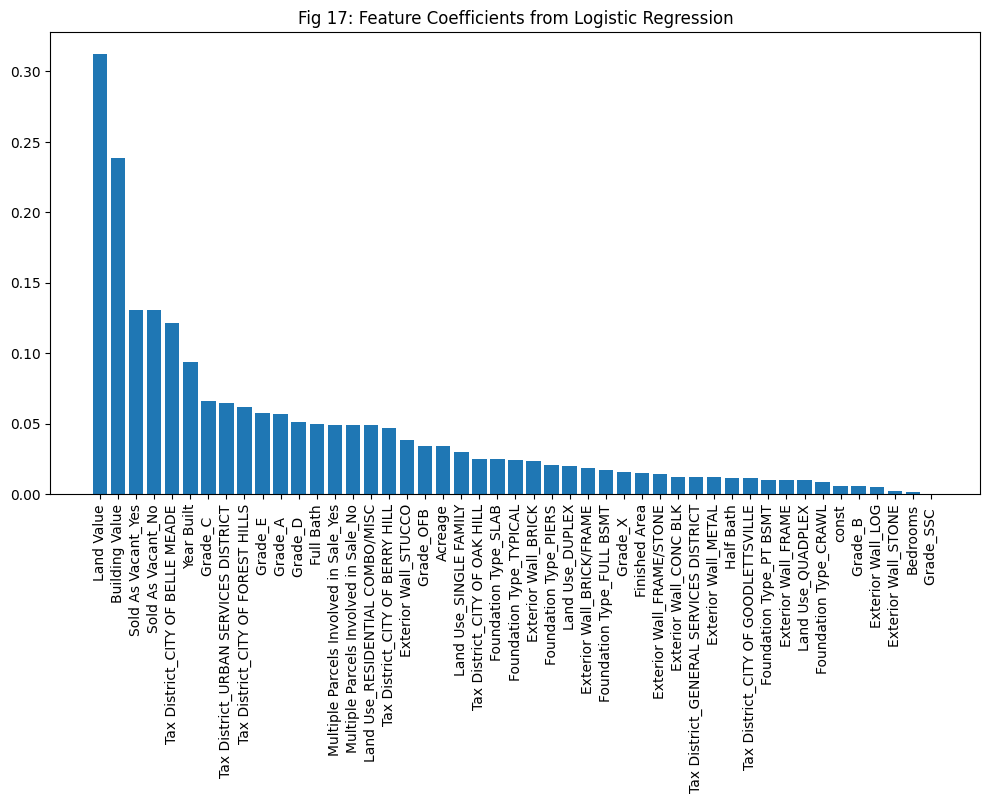

In [21]:
### Feature Importance for Logisctic Regression 

#Feature coefficients
feature_coefficients = model_log_reg.coef_[0]

# Create a DataFrame to display feature coefficients
importance_df_log_reg = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
importance_df_log_reg['Coefficient'] = np.abs(importance_df_log_reg['Coefficient'])  # Take absolute values for sorting
importance_df_log_reg = importance_df_log_reg.sort_values(by='Coefficient', ascending=False)

# Display the feature coefficients
print(importance_df_log_reg)

# Plot feature coefficients
plt.figure(figsize=(12, 6))
plt.bar(importance_df_log_reg['Feature'], importance_df_log_reg['Coefficient'])
plt.xticks(rotation=90)
plt.title('Fig 17: Feature Coefficients from Logistic Regression')
plt.show()

In [22]:
## PART 3 Decision Trees

# Create a Decision Tree Classifier
Dec_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
Dec_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dec = Dec_clf.predict(X_test)

# Evaluate the classifier
accuracy_dec = accuracy_score(y_test, y_pred_dec)
print("Accuracy:", accuracy_dec)


## PRUNE TREE for improved Accuracy

# Create a Decision Tree Classifier with pruning parameters
pruned_Dec_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the pruned classifier on the training set
pruned_Dec_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned_dec = pruned_Dec_clf.predict(X_test)

# Evaluate the pruned classifier
accuracy_pruned = accuracy_score(y_test, y_pred_pruned_dec)
print("Pruned Decision Tree Accuracy:", accuracy_pruned)


Accuracy: 0.6379769299023957
Pruned Decision Tree Accuracy: 0.7593167701863354


Classification Report for decision tress:
              precision    recall  f1-score   support

           0       0.29      0.34      0.31      1109
           1       0.77      0.74      0.75      3399

    accuracy                           0.64      4508
   macro avg       0.53      0.54      0.53      4508
weighted avg       0.66      0.64      0.65      4508

Confusion Matrix for decision trees:
[[ 374  735]
 [ 897 2502]]
Precision: 0.77
Recall: 0.74
Specificity: 0.33724075743913434


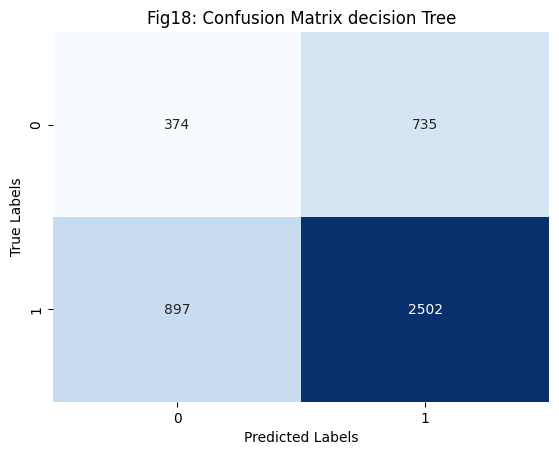

In [23]:
### MODEL EVALUATION for decison tree 

# Display additional classification metrics for decision tress 
Class_rep_dec = classification_report(y_test, y_pred_dec)
print("Classification Report for decision tress:")
print(Class_rep_dec)


# Extract metrics from classification report for decision tress 
cm_dec = confusion_matrix(y_test, y_pred_dec)
print("Confusion Matrix for decision trees:")
print(confusion_matrix(y_test, y_pred_dec))
precision = Class_rep_dec.split('\n')[3].split()[1]
recall = Class_rep_dec.split('\n')[3].split()[2]
specificity = cm_dec[0, 0] / (cm_dec[0, 0] + cm_dec[0, 1])


# Print the results for decison trees
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

# Plotting the confusion matrix using seaborn for decision TREES
sns.heatmap(cm_dec, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Fig18: Confusion Matrix decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

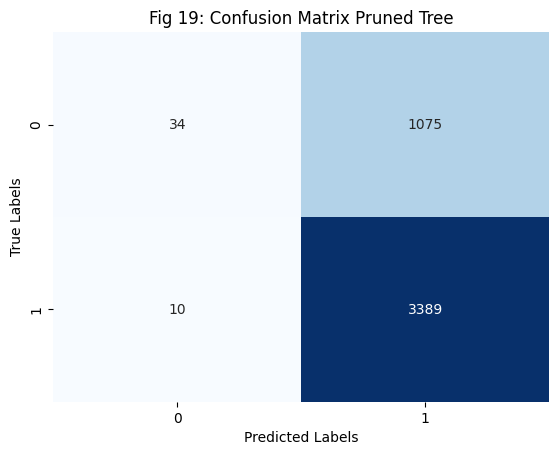

Classification Report Prune tree:
              precision    recall  f1-score   support

           0       0.77      0.03      0.06      1109
           1       0.76      1.00      0.86      3399

    accuracy                           0.76      4508
   macro avg       0.77      0.51      0.46      4508
weighted avg       0.76      0.76      0.66      4508

Precision: 0.76
Recall: 1.00
Specificity: 0.030658250676284943


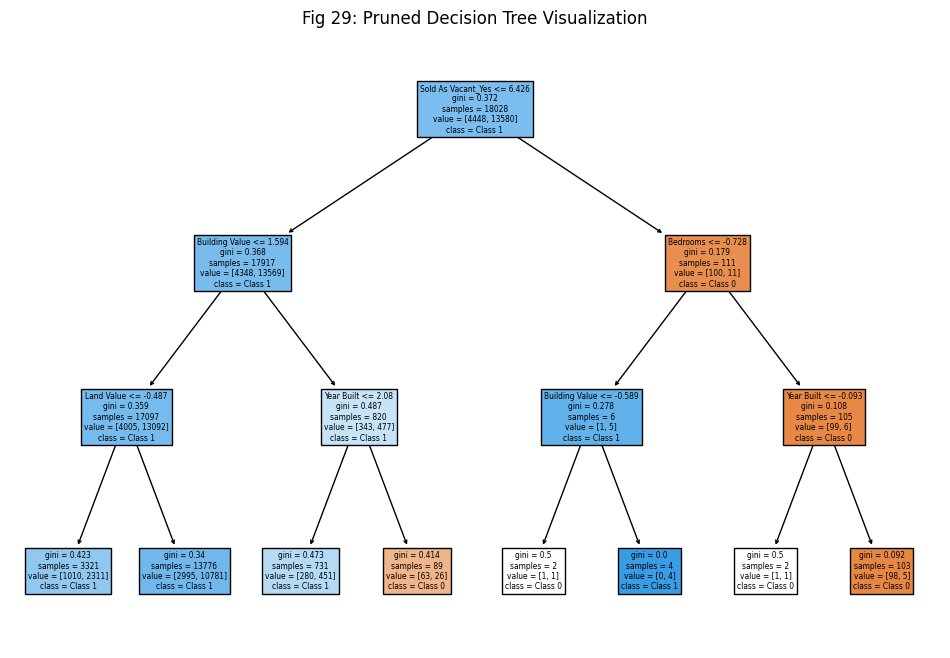

In [24]:

### MODEL EVALUATION for pruned decison trees

# Plotting the confusion matrix using seaborn for PRUNED decision TREES
cm_dec_pr = confusion_matrix(y_test, y_pred_pruned_dec)
sns.heatmap(cm_dec_pr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Fig 19: Confusion Matrix Pruned Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Class_rep_dec_pr = classification_report(y_test, y_pred_pruned_dec)
print("Classification Report Prune tree:")
print(Class_rep_dec_pr)

# Extract metrics from classification report
precision_pr = Class_rep_dec_pr.split('\n')[3].split()[1]
recall_pr = Class_rep_dec_pr.split('\n')[3].split()[2]
specificity_pr = cm_dec_pr[0, 0] / (cm_dec_pr[0, 0] + cm_dec_pr[0, 1])

# Print the results for pruned decison trees
print("Precision:", precision_pr)
print("Recall:", recall_pr)
print("Specificity:", specificity_pr)


# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_Dec_clf, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.title("Fig 29: Pruned Decision Tree Visualization")
plt.show()

                                   Feature  Importance
14                      Sold As Vacant_Yes    0.446916
3                           Building Value    0.250935
2                               Land Value    0.188160
5                               Year Built    0.082016
6                                 Bedrooms    0.031973
0                                    const    0.000000
36                     Exterior Wall_METAL    0.000000
28                    Foundation Type_SLAB    0.000000
29                 Foundation Type_TYPICAL    0.000000
30                     Exterior Wall_BRICK    0.000000
31               Exterior Wall_BRICK/FRAME    0.000000
32                  Exterior Wall_CONC BLK    0.000000
33                     Exterior Wall_FRAME    0.000000
34               Exterior Wall_FRAME/STONE    0.000000
35                       Exterior Wall_LOG    0.000000
38                    Exterior Wall_STUCCO    0.000000
37                     Exterior Wall_STONE    0.000000
26        

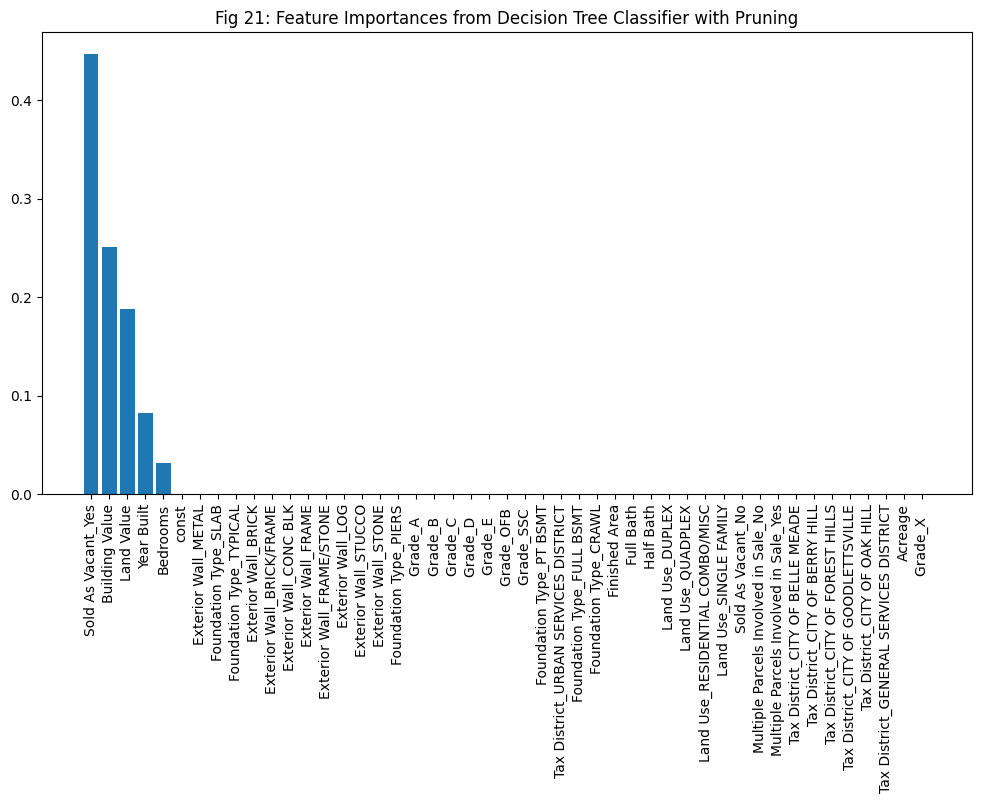

In [25]:
# FEATURE IMPORTANCE Pruned DECISION TREE

# Get feature importances
feature_importances_Dec_clf = pruned_Dec_clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df_Dec_clf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_Dec_clf})

# Sort the DataFrame by importance in descending order
importance_df_Dec_clf = importance_df_Dec_clf.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df_Dec_clf)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df_Dec_clf['Feature'], importance_df_Dec_clf['Importance'])
plt.xticks(rotation=90)
plt.title('Fig 21: Feature Importances from Decision Tree Classifier with Pruning')
plt.show()

Random Forest Classifier Accuracy: 0.7222715173025732
Confusion Matrix:
[[ 222  887]
 [ 365 3034]]


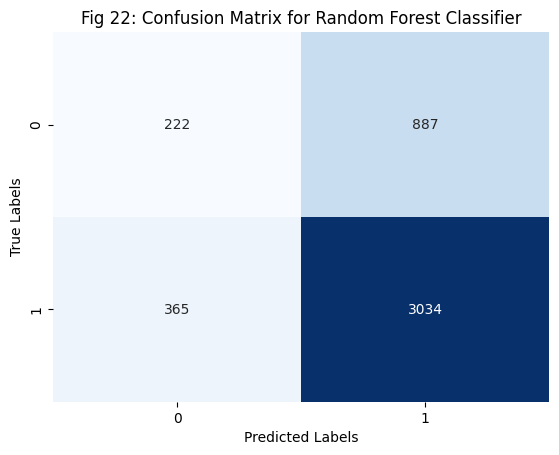

Precision: 0.77
Recall: 0.89
Specificity: 0.20018034265103696

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.20      0.26      1109
           1       0.77      0.89      0.83      3399

    accuracy                           0.72      4508
   macro avg       0.58      0.55      0.55      4508
weighted avg       0.68      0.72      0.69      4508



In [26]:
# PART 4 - RANDOM FOREST

# 1. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)


# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)


# MODEL EVALUATION

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


# Plotting the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Fig 22: Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, specificity, and other metrics
classification_rep = classification_report(y_test, y_pred_rf)

# Extract metrics from classification report
precision_rf = classification_rep.split('\n')[3].split()[1]
recall_rf = classification_rep.split('\n')[3].split()[2]
specificity_rf = cm[0, 0] / (cm[0, 0] + cm[0, 1])


# Print the results
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Specificity:", specificity_rf)
print("\nClassification Report:")
print(classification_rep)

                                   Feature  Importance
3                           Building Value    0.183538
4                            Finished Area    0.175366
1                                  Acreage    0.142528
5                               Year Built    0.138579
2                               Land Value    0.126750
6                                 Bedrooms    0.037527
7                                Full Bath    0.029583
8                                Half Bath    0.020257
24                   Foundation Type_CRAWL    0.012134
30                     Exterior Wall_BRICK    0.011310
25               Foundation Type_FULL BSMT    0.010717
33                     Exterior Wall_FRAME    0.009882
27                 Foundation Type_PT BSMT    0.009092
14                      Sold As Vacant_Yes    0.007659
23    Tax District_URBAN SERVICES DISTRICT    0.007066
41                              Grade_C       0.006934
31               Exterior Wall_BRICK/FRAME    0.006543
13        

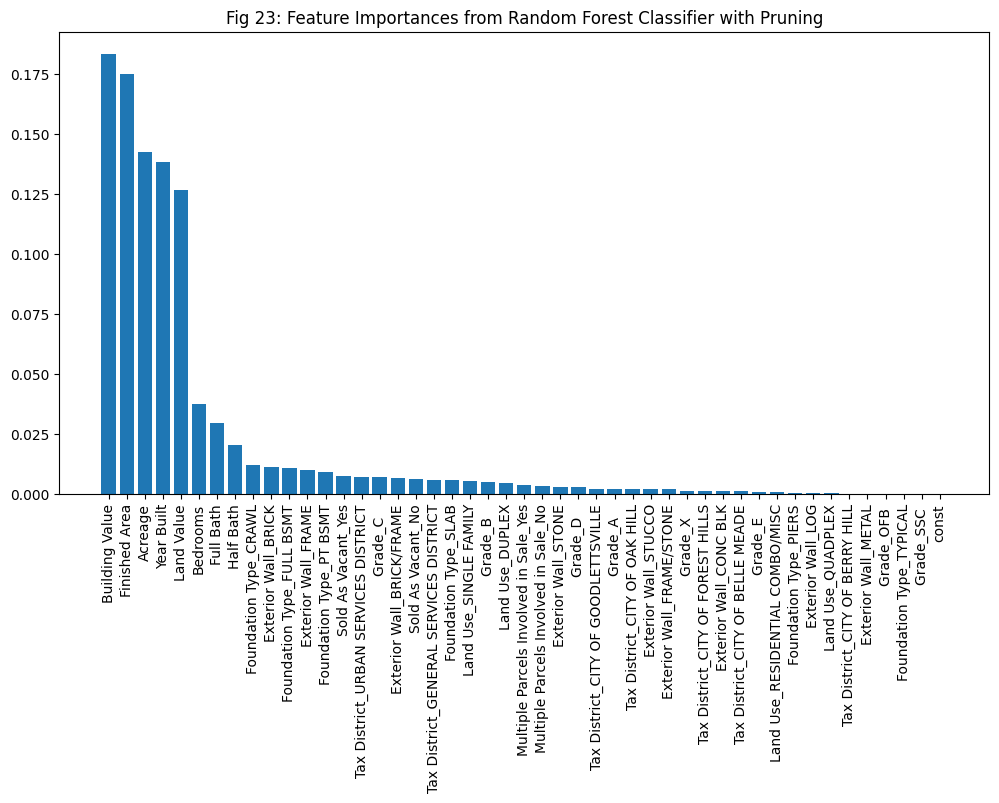

In [27]:
# FEATURE IMPORTANCE RANDOM FOREST

# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xticks(rotation=90)
plt.title('Fig 23: Feature Importances from Random Forest Classifier with Pruning')
plt.show()

In [28]:
### PART 5 GRADIENT BOOSTING:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training set
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)


# Evaluate the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

# Print the classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("\nClassification Report:")
print(classification_rep_gb)

Gradient Boosting Classifier Accuracy: 0.764418811002662

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.06      0.11      1109
           1       0.76      0.99      0.86      3399

    accuracy                           0.76      4508
   macro avg       0.78      0.53      0.49      4508
weighted avg       0.77      0.76      0.68      4508



[[  64 1045]
 [  17 3382]]


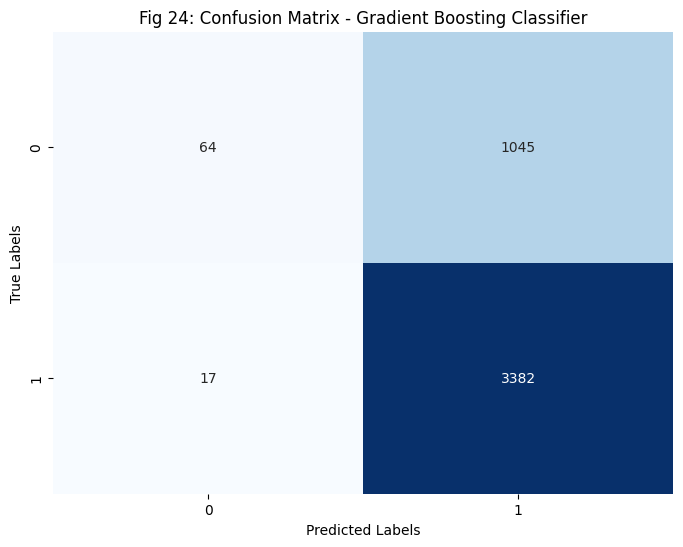

Precision: 0.7639
Recall: 0.9950
Specificity: 0.0577


In [29]:
# Confusion Matrix for GB
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)

# Precision, Recall, Specificity FOR GB
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

# True Negative Rate (Specificity)
tn, fp, fn, tp = conf_matrix_gb.ravel()
specificity_gb = tn / (tn + fp)

# Plot Confusion Matrix FOR GB
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Fig 24: Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print Precision, Recall, Specificity FRO GB
print(f'Precision: {precision_gb:.4f}')
print(f'Recall: {recall_gb:.4f}')
print(f'Specificity: {specificity_gb:.4f}')

                                   Feature  Importance
2                               Land Value    0.226222
3                           Building Value    0.211577
5                               Year Built    0.140664
13                       Sold As Vacant_No    0.131605
1                                  Acreage    0.074415
4                            Finished Area    0.051544
12                  Land Use_SINGLE FAMILY    0.028209
14                      Sold As Vacant_Yes    0.024598
7                                Full Bath    0.014590
23    Tax District_URBAN SERVICES DISTRICT    0.012697
6                                 Bedrooms    0.012605
16   Multiple Parcels Involved in Sale_Yes    0.012368
15    Multiple Parcels Involved in Sale_No    0.012031
30                     Exterior Wall_BRICK    0.007033
25               Foundation Type_FULL BSMT    0.006767
8                                Half Bath    0.006347
43                              Grade_E       0.006187
42        

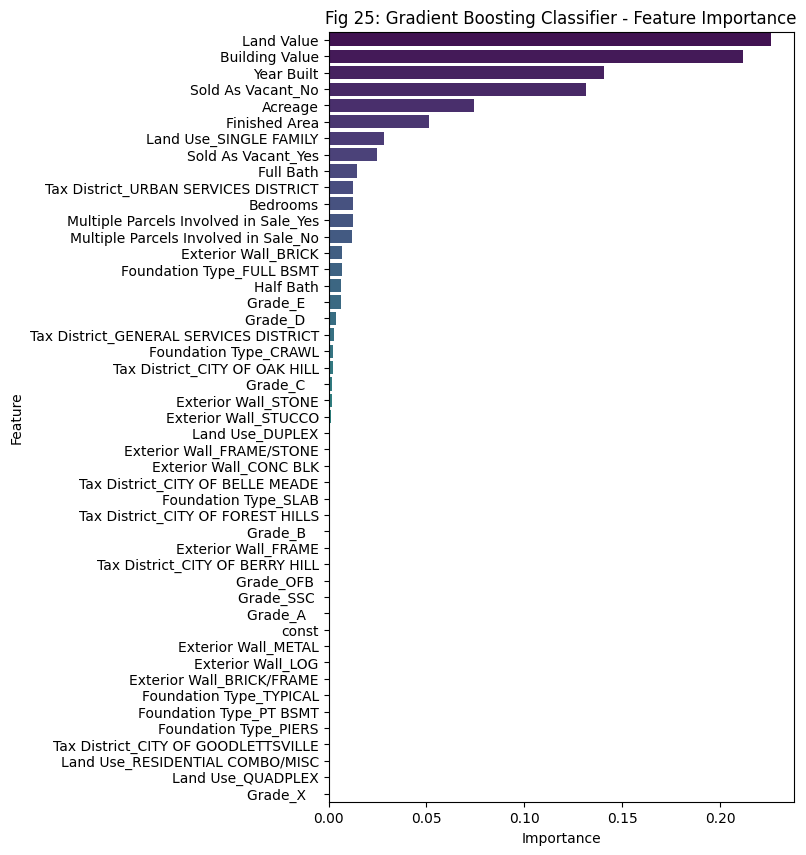

In [30]:
# Feature Importance GB
feature_importance_gb = gb_classifier.feature_importances_

# Create a DataFrame for better visualization GB
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_gb})

# Sort features by importance GB
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot Feature Importance GB
plt.figure(figsize=(6, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', orient='h')
plt.title('Fig 25: Gradient Boosting Classifier - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Sort the DataFrame by importance in descending order
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)


In [31]:

# PART 6 MODEL COMPARISON
# Collating results from all models
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree','Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_logreg, accuracy_dec, accuracy_pruned, accuracy_rf, accuracy_gb],
    'Precision': [precision_logreg, precision, precision_pr, precision_rf, precision_gb],
    'Recall': [recall_logreg, recall, recall_pr, recall_rf, recall_gb]
}

results_df = pd.DataFrame(results)

print("Table 1: Metrics Comparison")
results_df



Table 1: Metrics Comparison


,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.759539,0.76,1.00
1,Decision Tree,0.637977,0.77,0.74
2,Pruned Decision Tree,0.759317,0.76,1.00
3,Random Forest,0.722272,0.77,0.89
4,Gradient Boosting,0.764419,0.763948,0.994999


<Figure size 1500x1000 with 0 Axes>

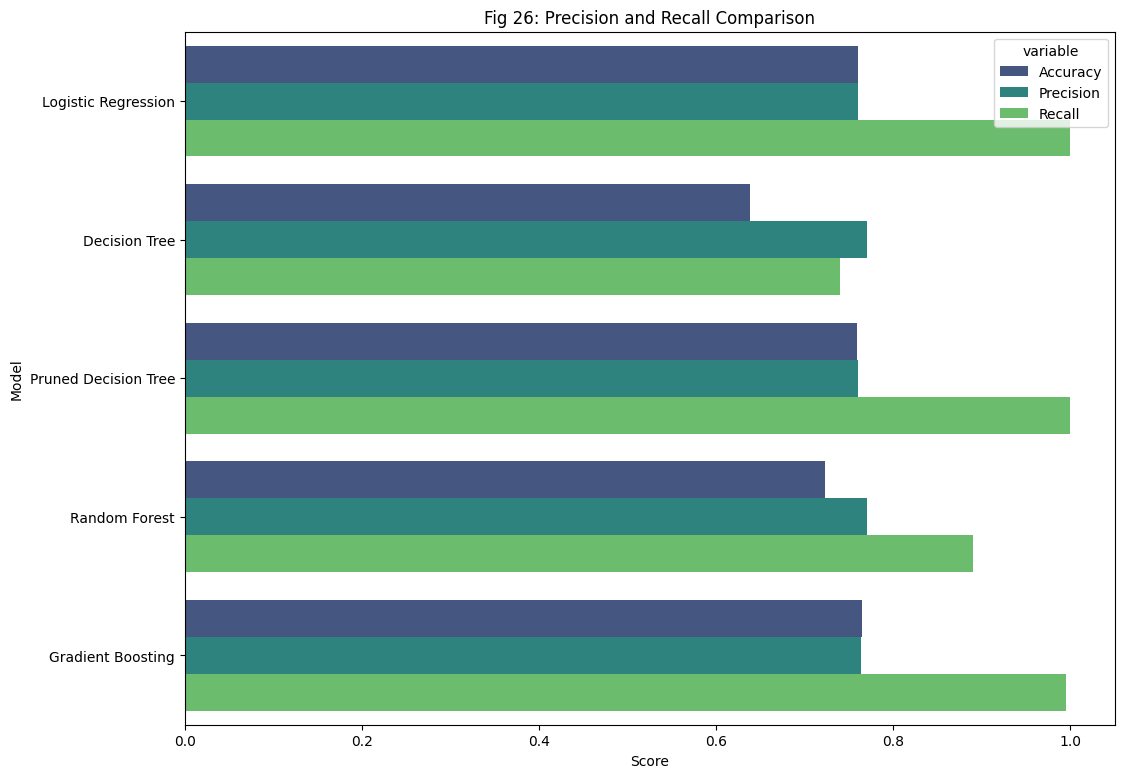

In [32]:
# Plotting the comparison
plt.figure(figsize=(15, 10))

# Melt the dataframe to long format for better visualization
melted_df = results_df.melt(id_vars=['Model'], value_vars=['Accuracy','Precision', 'Recall'])

# Plotting the comparison for Precision and Recall (horizontal bar plot)
plt.figure(figsize=(12, 9))
sns.barplot(x='value', y='Model', hue='variable', data=melted_df, palette='viridis', orient='h')
plt.title('Fig 26: Precision and Recall Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

In [33]:
# Model Comparison : Training Speed 

# Measure training time for Gradient boost
start_time = time.time()
gb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training Time (XGBoost): {training_time:.2f} seconds")

# Measure training time logit regression 
start_time_lr = time.time()
model_log_reg.fit(X_train, y_train)
training_time_lr = time.time() - start_time_lr
print(f"Training Time (logistic regression): {training_time_lr:.2f} seconds")



Training Time (XGBoost): 3.53 seconds
Training Time (logistic regression): 0.08 seconds


In [35]:
# Cfreating a new CSV
Df_reg.to_csv('Nashville.csv', index=False) 